In [1]:
import yfinance as yf
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime as dt
from datetime import timedelta

from matplotlib import pyplot as plt

In [2]:
# parameters for API call
start = start = dt.datetime(2010,12,1)
end = dt.datetime.now()
days = 14
ticker = 'NG=F' # 

In [3]:
# API request
df = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# rename adjusted close column
df = df.rename(columns={"Adj Close":'Adj_Close'})
df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-12-01,4.196,4.324,4.164,4.269,4.269,118741
2010-12-02,4.310,4.377,4.197,4.343,4.343,135776
2010-12-03,4.341,4.391,4.280,4.349,4.349,86975
2010-12-06,4.385,4.540,4.328,4.488,4.488,151475
2010-12-07,4.500,4.545,4.383,4.393,4.393,155154
...,...,...,...,...,...,...
2023-06-27,2.777,2.809,2.724,2.763,2.763,71154
2023-06-28,2.788,2.839,2.593,2.603,2.603,137907
2023-06-29,2.662,2.746,2.616,2.701,2.701,118610


In [5]:
# https://stackoverflow.com/questions/40256338/calculating-average-true-range-atr-on-ohlc-data-with-python
# fifth answer

# calculate Average True Range over length of dataset
ATR = pd.concat([df.High.sub(df.Low), df.High.sub(df.Adj_Close.shift()), df.Low.sub(df.Adj_Close.shift())], axis=1).max(1).ewm(span=14).mean()

In [6]:
ATR = pd.DataFrame(ATR)
ATR

,0
Date,
2010-12-01,0.160000
2010-12-02,0.170714
2010-12-03,0.147903
2010-12-06,0.167512
2010-12-07,0.166074
...,...
2023-06-27,0.137000
2023-06-28,0.151533
2023-06-29,0.150395


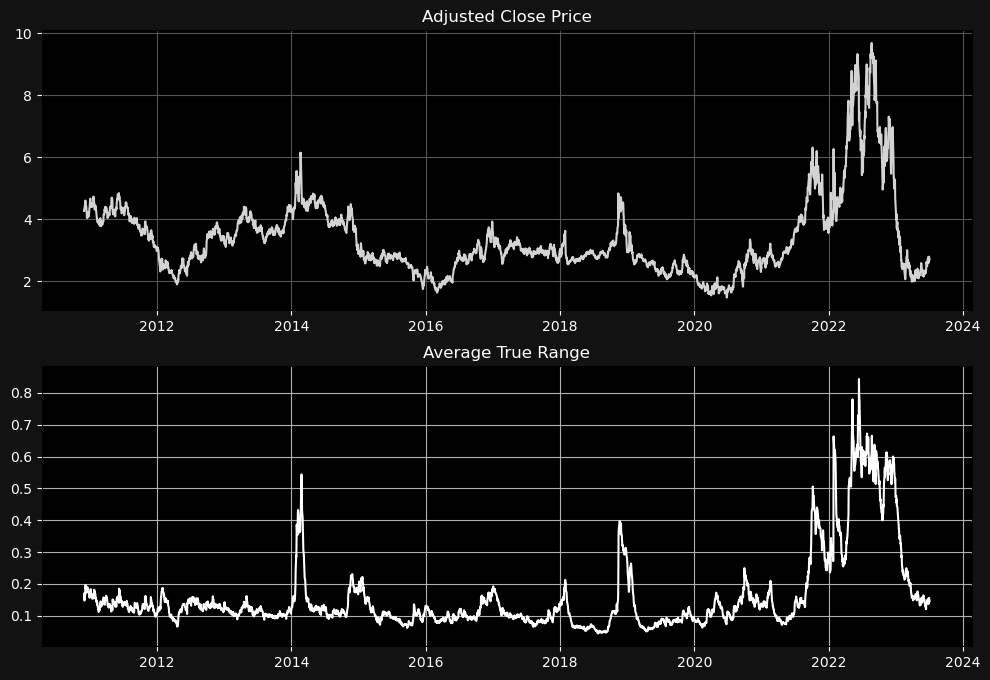

In [7]:
####### plot NG price and ATR over length of timeframe ########

plt.figure(figsize=(12,8))

## natural gas futures prices plot
ax1 = plt.subplot(211)
ax1.plot(df.index, df['Adj_Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color ="white")

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')


# 14 day ATR plot
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(df.index, ATR, color='white')



ax2.set_title('Average True Range', color='white')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


##################

plt.show()

In [8]:
# merge ATR data to price dataframe
merged_df = pd.concat([df, ATR], axis=1)


In [9]:
# rename 0 column to 'ATR'
merged_df.rename(columns={0:'ATR'}, inplace=True)

In [10]:
# final merged df
merged_df

,Open,High,Low,Close,Adj_Close,Volume,ATR
Date,,,,,,,
2010-12-01,4.196,4.324,4.164,4.269,4.269,118741,0.160000
2010-12-02,4.310,4.377,4.197,4.343,4.343,135776,0.170714
2010-12-03,4.341,4.391,4.280,4.349,4.349,86975,0.147903
2010-12-06,4.385,4.540,4.328,4.488,4.488,151475,0.167512
2010-12-07,4.500,4.545,4.383,4.393,4.393,155154,0.166074
...,...,...,...,...,...,...,...
2023-06-27,2.777,2.809,2.724,2.763,2.763,71154,0.137000
2023-06-28,2.788,2.839,2.593,2.603,2.603,137907,0.151533
2023-06-29,2.662,2.746,2.616,2.701,2.701,118610,0.150395


In [11]:
# export JSON file
# merged_df.to_json(r'C:\Users\13148\Desktop\NatGas_df.json')

In [12]:
# making index a 'Date' column
    # simplifies filtering by date in following steps
merged_df = merged_df.reset_index()


In [13]:
merged_df

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2010-12-01,4.196,4.324,4.164,4.269,4.269,118741,0.160000
1,2010-12-02,4.310,4.377,4.197,4.343,4.343,135776,0.170714
2,2010-12-03,4.341,4.391,4.280,4.349,4.349,86975,0.147903
3,2010-12-06,4.385,4.540,4.328,4.488,4.488,151475,0.167512
4,2010-12-07,4.500,4.545,4.383,4.393,4.393,155154,0.166074
...,...,...,...,...,...,...,...,...
3163,2023-06-27,2.777,2.809,2.724,2.763,2.763,71154,0.137000
3164,2023-06-28,2.788,2.839,2.593,2.603,2.603,137907,0.151533
3165,2023-06-29,2.662,2.746,2.616,2.701,2.701,118610,0.150395
3166,2023-06-30,2.677,2.828,2.634,2.798,2.798,147265,0.156209


In [14]:
# build list of years in timeframe
years = [year for year in range(2010,2020)]
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [15]:
# combine all winter data into single dataframe
filtered_df = pd.DataFrame()

for year in years:
    winter_df = merged_df.loc[(merged_df['Date'] >= f'{year}-12-01') & (merged_df['Date'] <f'{year+1}-03-01')]
    filtered_df = pd.concat([filtered_df, winter_df])

In [16]:
filtered_df

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2010-12-01,4.196,4.324,4.164,4.269,4.269,118741,0.160000
1,2010-12-02,4.310,4.377,4.197,4.343,4.343,135776,0.170714
2,2010-12-03,4.341,4.391,4.280,4.349,4.349,86975,0.147903
3,2010-12-06,4.385,4.540,4.328,4.488,4.488,151475,0.167512
4,2010-12-07,4.500,4.545,4.383,4.393,4.393,155154,0.166074
...,...,...,...,...,...,...,...,...
2319,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.071696
2320,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.067870
2321,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.068154
2322,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.074000


In [17]:
# export dataframe above in CSV file
filtered_df.to_csv('winter_NG_data.csv', index=False)


In [18]:
# price and ATR data for 12/01/2010 - 3/28/2011
winter_10_11 = merged_df.loc[(merged_df['Date'] >= '2010-12-01') & (merged_df['Date'] < '2011-03-01')]


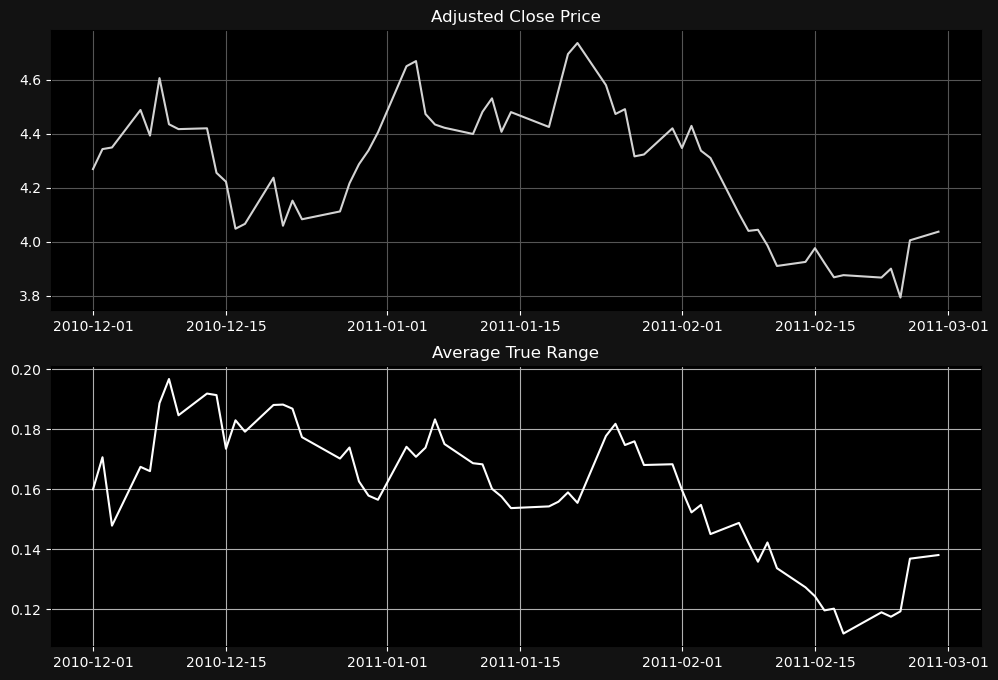

In [19]:
# plot price and ATR data for 12/01/2010 - 3/28/2011


plt.figure(figsize=(12,8))

## natural gas futures prices plot
ax1 = plt.subplot(211)
ax1.plot(winter_10_11['Date'], winter_10_11['Adj_Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color ="white")

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')


# 14 day ATR plot
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(winter_10_11['Date'], winter_10_11['ATR'], color='white')



ax2.set_title('Average True Range', color='white')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


##################

plt.show()